Objetivo Principal Desse Projeto

Identificar padrões ou agrupamentos (clusters) nos dados de transações semanais de vendas usando diferentes algoritmos de clusterização. O foco será no agrupamento de produtos para gerar insights sobre padrões de compra e otimizar estratégias de vendas.

Etapas do Projeto

Carregamento e Pré-processamento dos Dados

Utilizar a base de dados Sales_Transactions_Dataset_Weekly.csv, que contém informações sobre vendas semanais.
Remover colunas que começam com "Normalized", indicando que os dados normalizados serão recalculados posteriormente.
Escalar (normalizar) os dados para garantir que todas as variáveis tenham a mesma influência nos algoritmos de clusterização.

Aplicação de Algoritmos de Clusterização

K-Means: Algoritmo de clusterização baseado em centroides, com o número de clusters (n_clusters) definido previamente.
DBSCAN: Algoritmo baseado em densidade, que identifica clusters com base na proximidade dos pontos e na densidade local.
Agglomerative Clustering: Algoritmo hierárquico que agrupa os dados de forma iterativa, utilizando diferentes métodos de ligação (linkage).

Avaliação dos Resultados

Calcular o Silhouette Score para cada algoritmo, avaliando a qualidade dos clusters formados.
Comparar os resultados para determinar qual algoritmo produziu os melhores agrupamentos.

Visualização

Visualizar os clusters gerados pelos algoritmos para facilitar a interpretação dos resultados e identificar padrões.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml, make_blobs
import matplotlib.pyplot as plt
import time

# Carregar o conjunto de dados manualmente a partir de um arquivo CSV local
# Baixar o conjunto de dados em https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly
# Salvá-lo como 'sales_transactions_weekly.csv' no mesmo diretório que este notebook

#Carregar o conjunto de dados
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

# Remover todas as colunas que começam com "Normalized" como foram adicionados dados normalizados removemos para normalizar depois
df_original = df.loc[:, ~df.columns.str.startswith('Normalized')]

X = df_original

In [38]:
# Remover a coluna categórica "Product_Code" (que não pode ser normalizada)
X = X.drop(columns=["Product_Code"])

In [39]:
# Exibir informações básicas sobre o conjunto de dados
print("Dataset loaded successfully.")
print("Shape of X:", X.shape)


Dataset loaded successfully.
Shape of X: (811, 54)


In [40]:
# Exibir informações básicas sobre os dados
print("\nInformações sobre os dados:")
print(X.info())
print("\nPrimeiras linhas dos dados:")
print(X.head())


Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W0      811 non-null    int64
 1   W1      811 non-null    int64
 2   W2      811 non-null    int64
 3   W3      811 non-null    int64
 4   W4      811 non-null    int64
 5   W5      811 non-null    int64
 6   W6      811 non-null    int64
 7   W7      811 non-null    int64
 8   W8      811 non-null    int64
 9   W9      811 non-null    int64
 10  W10     811 non-null    int64
 11  W11     811 non-null    int64
 12  W12     811 non-null    int64
 13  W13     811 non-null    int64
 14  W14     811 non-null    int64
 15  W15     811 non-null    int64
 16  W16     811 non-null    int64
 17  W17     811 non-null    int64
 18  W18     811 non-null    int64
 19  W19     811 non-null    int64
 20  W20     811 non-null    int64
 21  W21     811 non-null    int64
 22  W22     811 non-null 

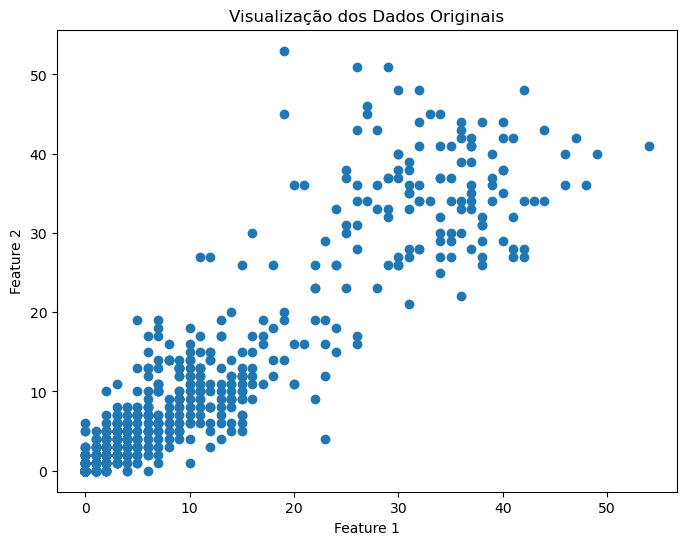

In [41]:
# imprimindo dados originais 
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.title("Visualização dos Dados Originais")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [42]:
# Verificar valores ausentes
print("\nValores ausentes por coluna:")
X.isnull().sum()


Valores ausentes por coluna:


W0     0
W1     0
W2     0
W3     0
W4     0
W5     0
W6     0
W7     0
W8     0
W9     0
W10    0
W11    0
W12    0
W13    0
W14    0
W15    0
W16    0
W17    0
W18    0
W19    0
W20    0
W21    0
W22    0
W23    0
W24    0
W25    0
W26    0
W27    0
W28    0
W29    0
W30    0
W31    0
W32    0
W33    0
W34    0
W35    0
W36    0
W37    0
W38    0
W39    0
W40    0
W41    0
W42    0
W43    0
W44    0
W45    0
W46    0
W47    0
W48    0
W49    0
W50    0
W51    0
MIN    0
MAX    0
dtype: int64

In [43]:
# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas para colunas numéricas:")
X.describe()


Estatísticas descritivas para colunas numéricas:


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026,3.780518,16.308261
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011,6.403214,17.150637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,0.000000,9.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000,4.000000,21.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000,24.000000,73.000000


In [44]:
# normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.17391867,  0.22859969,  0.04681724, ...,  0.11630659,
        -0.12196992,  0.27372941],
       [-0.15776396, -0.2492208 , -0.49011498, ..., -0.93058184,
        -0.59077375, -0.36804196],
       [-0.15776396,  0.14896294, -0.10659197, ..., -0.19775994,
        -0.12196992, -0.13467055],
       ...,
       [-0.65528791, -0.72704129, -0.72022878, ..., -0.61651531,
        -0.59077375, -0.71809907],
       [-0.73820856, -0.72704129, -0.72022878, ..., -0.93058184,
        -0.59077375, -0.83478477],
       [-0.73820856, -0.64740454, -0.72022878, ..., -0.82589299,
        -0.59077375, -0.77644192]])

In [45]:
# Análise de Componentes principais 

from sklearn.decomposition import PCA

# Aplicar PCA para reduzir a dimensionalidade para 20 componentes principais
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

# Exibir a variância explicada por cada componente principal
print("Variância explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Variância explicada por cada componente principal:
[0.92068087 0.01048955 0.00274964 0.00253115 0.00245754 0.00242138
 0.0023538  0.00229808 0.00214063 0.00205752 0.00195013 0.00193528
 0.00188144 0.00179943 0.00172127 0.00169774 0.00165298 0.0016009
 0.00152818 0.0015073 ]


Observamos que os 2 componentes principais resumem a maior parte da variância dos dados.

Variação explicada pelos componentes principais: [0.92068087 0.01048955]


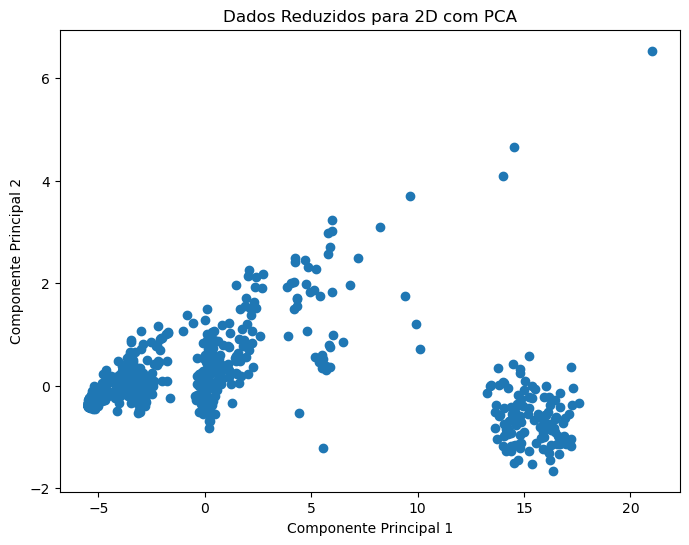

In [46]:
# Aplicar PCA para reduzir a dimensionalidade para 2 componentes
def aplicar_pca(X_scaled, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    # Visualizar a variação explicada pelos componentes principais
    print("Variação explicada pelos componentes principais:", pca.explained_variance_ratio_)
    return X_pca

X_pca_2d = aplicar_pca(X_scaled, n_components=2)

# Visualizar os dados reduzidos em 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])
plt.title("Dados Reduzidos para 2D com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()  





In [47]:
# Função para visualizar os dados e os clusters
def visualizar_dados(X_pca_2d, kmeans_labels, dbscan_labels, agglo_labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_labels, cmap='viridis', s=50, label='K-Means')
    plt.title("Clusters Gerados pelo K-Means")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=dbscan_labels, cmap='viridis', s=50, label='DBSCAN')
    plt.title("Clusters Gerados pelo DBSCAN")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=agglo_labels, cmap='viridis', s=50, label='Agglomerative')
    plt.title("Clusters Gerados pelo Agglomerative Clustering")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.show()


In [48]:
# função para determinar melhor parametro para o kmeans
def determinar_melhor_k(data, max_k=10):
    """
    Determina o melhor número de clusters (K) para o K-Means 
    usando o Método do Cotovelo e a Pontuação Silhouette.
    
    Parâmetros:
    - data: array ou DataFrame com os dados a serem clusterizados.
    - max_k: número máximo de clusters a testar (padrão: 10).

    Retorna:
    - Melhor valor de K sugerido pelos métodos.
    """
    distortions = []  # Armazena a soma dos erros quadráticos
    silhouette_scores = []  # Armazena as pontuações Silhouette
    k_values = range(2, max_k + 1)  # Testamos a partir de K=2

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        
        # Método do Cotovelo (Inércia)
        distortions.append(kmeans.inertia_)
        
        # Método da Silhouette (se K > 1)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    # Plotando o Método do Cotovelo
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_values, distortions, marker='o', linestyle='--')
    plt.xlabel("Número de Clusters (K)")
    plt.ylabel("Soma dos Erros Quadráticos (Inertia)")
    plt.title("Método do Cotovelo")

    # Plotando o Método da Silhouette
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='s', linestyle='--', color='red')
    plt.xlabel("Número de Clusters (K)")
    plt.ylabel("Silhouette Score")
    plt.title("Pontuação Silhouette")

    plt.show()

    # Melhor K pelo método da silhouette (maior score)
    melhor_k_silhouette = k_values[np.argmax(silhouette_scores)]
    
    print(f"🔹 Melhor K sugerido pelo Método da Silhouette: {melhor_k_silhouette}")

    return melhor_k_silhouette

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

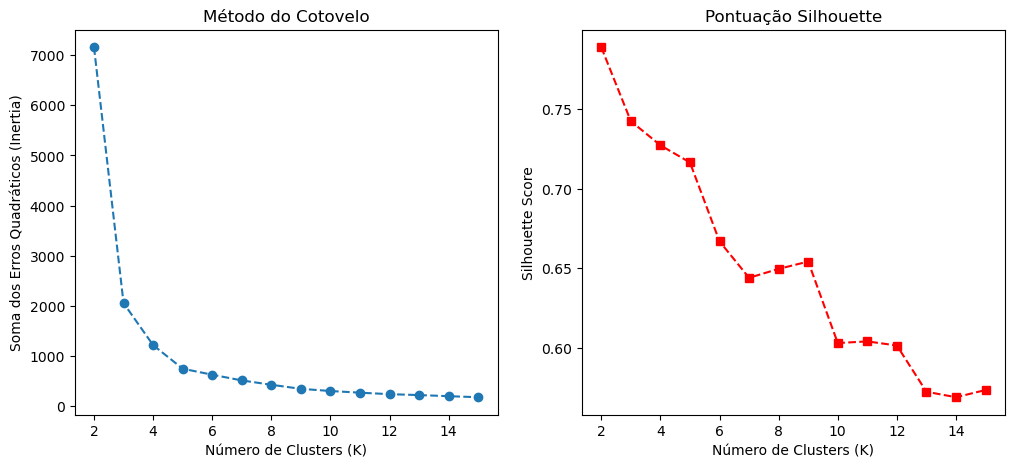

🔹 Melhor K sugerido pelo Método da Silhouette: 2


In [49]:
# Chamando a função de determinar melhor K para mostrar os resultados
melhor_k = determinar_melhor_k(X_pca_2d, max_k=15)


In [50]:
# função para aplicar o kmeans
def aplicar_kmeans(X_pca_2d, n_clusters, random_state=42):
    """
    Aplica o algoritmo K-Means aos dados reduzidos para 2D.

    Parâmetros:
    - X_pca_2d: array com os dados reduzidos para 2 dimensões.
    - n_clusters: número de clusters definido previamente.
    - random_state: semente para reprodutibilidade (padrão: 42).

    Retorna:
    - labels: rótulos atribuídos pelo K-Means.
    - score: pontuação Silhouette.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(X_pca_2d)
    score = silhouette_score(X_pca_2d, labels)
    
    return labels, score

In [51]:
# função para determinar os melhores parametros para o DBSCAN
def definir_melhores_parametros_dbscan(X_pca_2d, eps_range, min_samples_range):
    """
    Define os melhores valores de parâmetros para o DBSCAN com base na pontuação Silhouette.

    Parâmetros:
    - X_pca_2d: array com os dados reduzidos para 2 dimensões.
    - eps_range: lista de valores para o parâmetro eps.
    - min_samples_range: lista de valores para o parâmetro min_samples.

    Retorna:
    - Um dicionário com os melhores valores de eps, min_samples, a melhor pontuação Silhouette e os rótulos correspondentes.
    """
    melhor_score = -1
    melhor_eps = None
    melhor_min_samples = None
    melhor_labels = None

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_pca_2d)
            
            # Calcular a pontuação Silhouette apenas se houver mais de um cluster
            if len(set(labels)) > 1:
                score = silhouette_score(X_pca_2d, labels)
                if score > melhor_score:
                    melhor_score = score
                    melhor_eps = eps
                    melhor_min_samples = min_samples
                    melhor_labels = labels

    return {
        "melhor_eps": melhor_eps,
        "melhor_min_samples": melhor_min_samples,
        "melhor_score": melhor_score,
        "melhor_labels": melhor_labels
    }

In [52]:
# definindo o intervalo de valores
eps_range = np.linspace(0.05, 2.0, 20)  # Intervalo de valores para o parâmetro eps
min_samples_range = range(2, 20, 2)    # Intervalo de valores para o parâmetro min_samples

# chamando a função de melhores parametros para DBSCAN
melhores_parametros_dbscan = definir_melhores_parametros_dbscan(X_pca_2d, eps_range, min_samples_range)

# Exibindo os melhores parâmetros encontrados
print("Melhores parâmetros para DBSCAN:")
print(f"eps: {melhores_parametros_dbscan['melhor_eps']}")
print(f"min_samples: {melhores_parametros_dbscan['melhor_min_samples']}")
print(f"Silhouette Score: {melhores_parametros_dbscan['melhor_score']}")

Melhores parâmetros para DBSCAN:
eps: 1.7947368421052632
min_samples: 4
Silhouette Score: 0.7760111653357081


In [53]:
# função de aplicação do DBSCAN
def aplicar_dbscan(X_pca_2d, eps=0.5, min_samples=5):
    """
    Aplica o algoritmo DBSCAN aos dados reduzidos para 2 dimensões.

    Parâmetros:
    - X_pca_2d: array com os dados reduzidos para 2 dimensões.
    - eps: valor para o raio máximo de um ponto vizinho.
    - min_samples: número mínimo de pontos para formar um cluster.

    Retorna:
    - labels: rótulos atribuídos pelo DBSCAN.
    - score: pontuação Silhouette (se houver mais de um cluster).
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_pca_2d)

    # Exibir os rótulos para depuração
    print(f"eps={eps}, min_samples={min_samples}, labels={set(labels)}")

    # Calcular a pontuação Silhouette apenas se houver pelo menos dois clusters distintos
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Desconsidera ruído (-1)
    score = silhouette_score(X_pca_2d, labels) if n_clusters > 1 else -1

    return labels, score

In [54]:
def definir_melhores_parametros_agglomerative(X_pca_2d, cluster_range, linkage_options):
    """
    Define os melhores parâmetros para o AgglomerativeClustering com base na pontuação Silhouette.

    Parâmetros:
    - X_pca_2d: array com os dados reduzidos para 2 dimensões.
    - cluster_range: intervalo de valores para o número de clusters.
    - linkage_options: lista de opções de linkage ('ward', 'complete', 'average', 'single').

    Retorna:
    - Um dicionário com os melhores valores de número de clusters, método de linkage, 
      a melhor pontuação Silhouette e os rótulos correspondentes.
    """
    melhor_score = -1
    melhor_n_clusters = None
    melhor_linkage = None
    melhor_labels = None

    for n_clusters in cluster_range:
        for linkage in linkage_options:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = agglo.fit_predict(X_pca_2d)
            
            # Calcular a pontuação Silhouette apenas se houver mais de um cluster
            if len(set(labels)) > 1:
                score = silhouette_score(X_pca_2d, labels)
                if score > melhor_score:
                    melhor_score = score
                    melhor_n_clusters = n_clusters
                    melhor_linkage = linkage
                    melhor_labels = labels

    return {
        "melhor_n_clusters": melhor_n_clusters,
        "melhor_linkage": melhor_linkage,
        "melhor_score": melhor_score,
        "melhor_labels": melhor_labels
    }

In [55]:
# Definir os intervalos de valores para os parâmetros
cluster_range = range(2, 10)  # Intervalo de número de clusters
linkage_options = ['ward', 'complete', 'average', 'single']  # Opções de linkage

# Chamar a função para encontrar os melhores parâmetros
melhores_parametros_agglomerative = definir_melhores_parametros_agglomerative(X_pca_2d, cluster_range, linkage_options)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros para Agglomerative Clustering:")
print(f"Número de Clusters: {melhores_parametros_agglomerative['melhor_n_clusters']}")
print(f"Método de Linkage: {melhores_parametros_agglomerative['melhor_linkage']}")
print(f"Silhouette Score: {melhores_parametros_agglomerative['melhor_score']}")

Melhores parâmetros para Agglomerative Clustering:
Número de Clusters: 2
Método de Linkage: complete
Silhouette Score: 0.8018403876157425


In [56]:
# função para aplicar Agglomerative Clustering
def aplicar_agglomerative(X_pca_2d, n_clusters, linkage='ward'):
    """
    Aplica o Agglomerative Clustering aos dados reduzidos para 2 dimensões.

    Parâmetros:
    - X_pca_2d: array com os dados reduzidos para 2 dimensões.
    - n_clusters: número de clusters definido previamente.
    - linkage: método de linkage ('ward', 'complete', 'average' ou 'single').

    Retorna:
    - labels: rótulos atribuídos pelo Agglomerative Clustering.
    - score: pontuação Silhouette.
    """
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = agglo.fit_predict(X_pca_2d)

    # Calcular a pontuação Silhouette
    score = silhouette_score(X_pca_2d, labels) if len(set(labels)) > 1 else -1

    return labels, score

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


eps=1.7947368421052632, min_samples=4, labels={0, 1, -1}

🔹 Silhouette Scores:
K-Means: 0.7887242886039116
DBSCAN: 0.7760111653357081
Hierárquico Aglomerativo: 0.8018403876157425


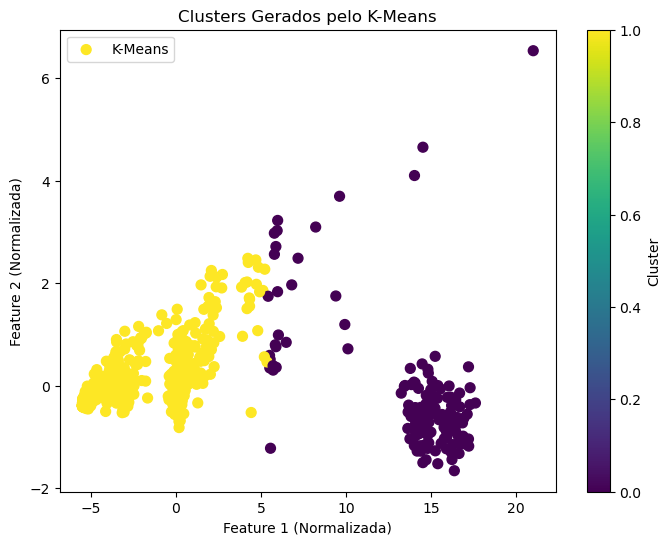

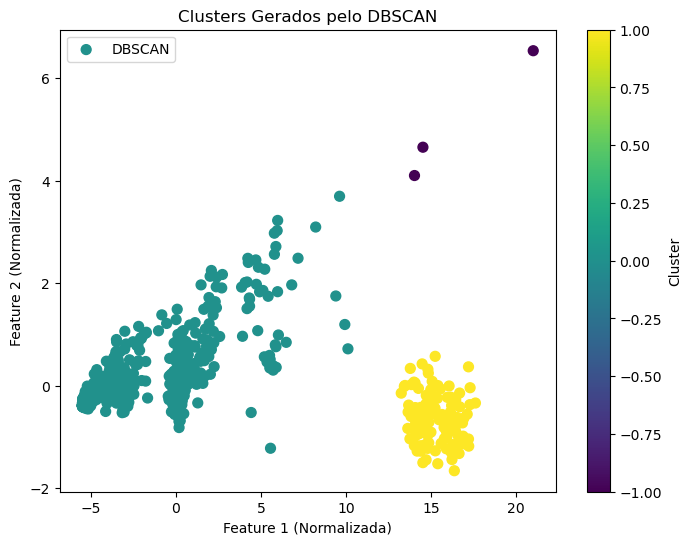

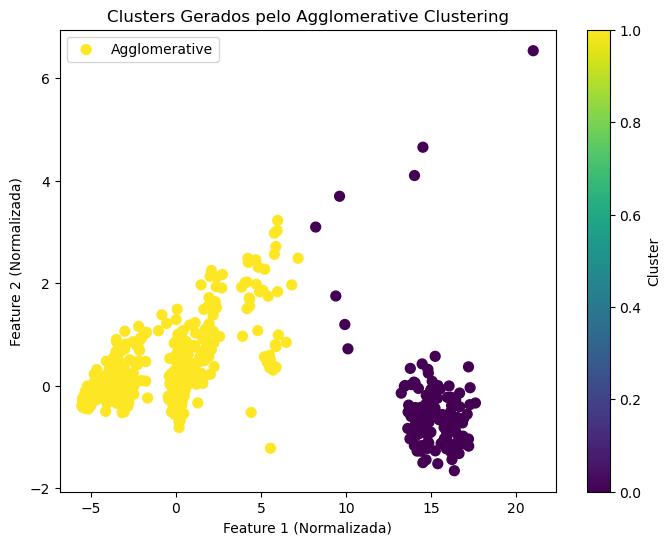

In [57]:
# Garantir que os melhores parâmetros para K-Means foram encontrados
if melhor_k is not None:
    kmeans_labels, kmeans_score = aplicar_kmeans(X_pca_2d, n_clusters=melhor_k)
else:
    kmeans_labels, kmeans_score = None, None

# Garantir que os melhores parâmetros para DBSCAN foram encontrados
if melhores_parametros_dbscan["melhor_eps"] is not None and melhores_parametros_dbscan["melhor_min_samples"] is not None:
    dbscan_labels, dbscan_score = aplicar_dbscan(
        X_pca_2d, 
        eps=melhores_parametros_dbscan["melhor_eps"], 
        min_samples=melhores_parametros_dbscan["melhor_min_samples"]
    )
else:
    dbscan_labels, dbscan_score = None, None

# Garantir que os melhores parâmetros para Agglomerative Clustering foram encontrados
if melhores_parametros_agglomerative["melhor_n_clusters"] is not None and melhores_parametros_agglomerative["melhor_linkage"] is not None:
    agglo_labels, agglo_score = aplicar_agglomerative(
        X_pca_2d, 
        n_clusters=melhores_parametros_agglomerative["melhor_n_clusters"], 
        linkage=melhores_parametros_agglomerative["melhor_linkage"]
    )
else:
    agglo_labels, agglo_score = None, None

# Comparar os resultados
print("\n🔹 Silhouette Scores:")
print(f"K-Means: {kmeans_score if kmeans_score is not None else 'Não calculado'}")
print(f"DBSCAN: {dbscan_score if dbscan_score is not None else 'Não calculado'}")
print(f"Hierárquico Aglomerativo: {agglo_score if agglo_score is not None else 'Não calculado'}")

# Visualizar os dados e clusters (somente se os rótulos forem válidos)
visualizar_dados(
    X_pca_2d, 
    *(label for label in [kmeans_labels, dbscan_labels, agglo_labels] if label is not None)
)


In [58]:
# aplicação de validação cruzada
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, rand_score

def validar_clusters(X_pca_2d, labels_dict, true_labels=None):
    """
    Valida os clusters gerados usando diferentes métricas de avaliação.

    Parâmetros:
    - X_pca_2d: array com os dados reduzidos para 2 dimensões.
    - labels_dict: dicionário contendo os rótulos dos clusters gerados por diferentes algoritmos.
    - true_labels: array contendo os rótulos verdadeiros (opcional, necessário para Rand Index).

    Retorna:
    - Um dicionário com as métricas calculadas para cada algoritmo.
    """
    resultados = {}

    for algoritmo, labels in labels_dict.items():
        if len(set(labels)) > 1:  # Garantir que há mais de um cluster
            silhouette = silhouette_score(X_pca_2d, labels)
            calinski_harabasz = calinski_harabasz_score(X_pca_2d, labels)
            davies_bouldin = davies_bouldin_score(X_pca_2d, labels)

            # Calcular Rand Index apenas se os rótulos verdadeiros forem fornecidos
            rand_index = rand_score(true_labels, labels) if true_labels is not None else None
        else:
            silhouette = calinski_harabasz = davies_bouldin = rand_index = None

        resultados[algoritmo] = {
            "Silhouette Score": silhouette,
            "Calinski-Harabasz Index": calinski_harabasz,
            "Davies-Bouldin Index": davies_bouldin,
            "Rand Index": rand_index if true_labels is not None else "Não aplicável"
        }

    return resultados

# Dicionário com os rótulos dos clusters gerados
labels_dict = {
    "K-Means": kmeans_labels,
    "DBSCAN": dbscan_labels,
    "Agglomerative": agglo_labels
}

# Validar os clusters (substitua `true_labels` pelos rótulos reais se disponíveis)
resultados_validacao = validar_clusters(X_pca_2d, labels_dict, true_labels=None)

# Exibir os resultados
for algoritmo, metricas in resultados_validacao.items():
    print(f"\n🔹 {algoritmo}:")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor if valor is not None else 'Não aplicável'}")



🔹 K-Means:
Silhouette Score: 0.7887242886039116
Calinski-Harabasz Index: 3800.456375251925
Davies-Bouldin Index: 0.3023591873272015
Rand Index: Não aplicável

🔹 DBSCAN:
Silhouette Score: 0.7760111653357081
Calinski-Harabasz Index: 1733.6114012153944
Davies-Bouldin Index: 0.575550945075366
Rand Index: Não aplicável

🔹 Agglomerative:
Silhouette Score: 0.8018403876157425
Calinski-Harabasz Index: 3744.0371208489178
Davies-Bouldin Index: 0.22411570979925594
Rand Index: Não aplicável


Silhouette Score: Mede a separação entre clusters e a coesão dentro deles (quanto maior, melhor).

Calinski-Harabasz Index: Avalia a compactação e separação dos clusters (quanto maior, melhor).

Davies-Bouldin Index: Indica o quão sobrepostos e mal definidos os clusters estão (quanto menor, melhor).

| Algoritmo       | Silhouette Score (↑) | CH Index (↑)       | DB Index (↓)       | Rand Index         |
|------------------|-----------------------|--------------------|--------------------|--------------------|
| **K-Means**     | 0.7887                | 3800.46 ✅         | 0.3024             | Não aplicável      |
| **DBSCAN**      | 0.7760                | 1733.61            | 0.5756             | Não aplicável      |
| **Agglomerative** | 0.8018 ✅            | 3744.04            | 0.2241 ✅          | Não aplicável      |

**Comparação geral:**

- **Agglomerative Clustering** teve o melhor Silhouette Score e o menor Davies-Bouldin Index, sugerindo que seus clusters são mais bem definidos e separados.
- **K-Means** teve o melhor Calinski-Harabasz Index, indicando clusters bem compactos e separados.
- **DBSCAN** apresentou os piores scores, indicando que pode não ser o método mais adequado para este conjunto de dados.

**Recomendação:**

O melhor algoritmo é o **Agglomerative Clustering**, pois apresentou os melhores valores gerais. No entanto, o **K-Means** também teve um desempenho sólido e pode ser considerado como uma alternativa viável.


C:\Users\ES90012\AppData\Local\Temp\ipykernel_30348\350125853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Cluster_Agglomerative'] = agglo_labels
C:\Users\ES90012\AppData\Local\Temp\ipykernel_30348\350125853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Weekly_Sales'] = df_original.loc[:, 'W0':'W51'].sum(axis=1)


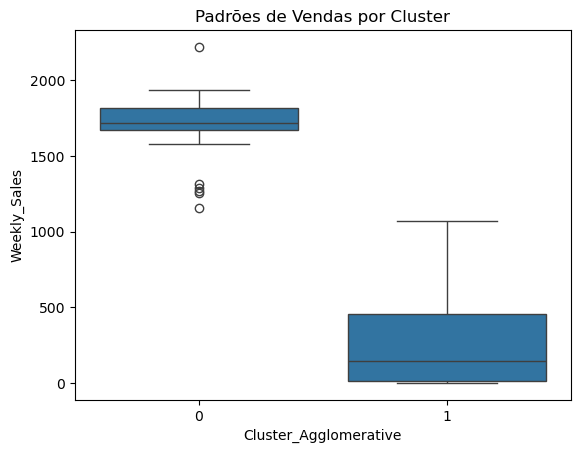

In [60]:
# verificando padrões de vendas
if agglo_labels is not None:
    df_original['Cluster_Agglomerative'] = agglo_labels

# Calcular a soma das vendas semanais
df_original['Weekly_Sales'] = df_original.loc[:, 'W0':'W51'].sum(axis=1)

# Visualizar padrões de vendas
sns.boxplot(x='Cluster_Agglomerative', y='Weekly_Sales', data=df_original)
plt.title('Padrões de Vendas por Cluster')
plt.show()

O gráfico boxplot gerado mostra os padrões de vendas semanais por cluster utilizando o Agglomerative Clustering. Aqui estão algumas interpretações com base na imagem:

Interpretação dos Clusters
O Cluster 0 possui um nível de vendas mais alto e estável, com uma mediana próxima a 1.700 vendas semanais.

Apresenta alguns outliers acima e abaixo da faixa principal.

O Cluster 1 tem um comportamento diferente, com vendas significativamente menores, variando entre 0 e 1000.

A mediana parece estar próxima de 100 a 200 vendas semanais, indicando um perfil de produtos com menor volume de vendas.

A dispersão no Cluster 1 é maior, sugerindo maior variabilidade nos padrões de vendas.

Conclusões
O modelo Agglomerative Clustering separou dois grupos bem distintos:

Cluster 0 → Produtos de alto volume de vendas.

Cluster 1 → Produtos com baixas vendas e maior variabilidade.

Isso pode ajudar a entender quais produtos ou lojas precisam de mais atenção para estratégias de promoção ou otimização de estoque.

O Cluster 1 pode conter produtos de nicho ou menos populares, enquanto o Cluster 0 pode representar os mais vendidos e essenciais.